In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spin_colors = ['#8C2542', '#C84150', '#F06E4A', '#FEAE6D', '#FADA93', '#F0F5A5', '#BBF0AC', '#7ED4B7', '#4484B0', '#6852A9']
spin_order = ['Speckle', 'Interior_Act1', 'Interior_Act2', 'Interior_Act3', 'Interior_Repr1', 'Interior_Repr2', 'Near_Lm1', 'Near_Lm2', 'Lamina_Like', 'Lamina']

Y= (10e-2,10e+0)
Yn = (-1, 1)

In [28]:
double_depl = pd.read_csv('../data/genes_double_vs_control_res_LFC.csv', index_col=0)
SON_depl = pd.read_csv('../data/genes_SONd_vs_control_res_LFC.csv', index_col=0)
SRRM2_depl = pd.read_csv('../data/genes_SRRM2d_vs_control_res_LFC.csv', index_col=0)
SRRM2_depl

,baseMean,log2FoldChange,lfcSE,pvalue,padj
chr2&96705929&96740064&-&LMAN2L&ENSG00000114988&protein_coding&0.4496850739709975&Speckle&Speckle_100& 34135,142.900324,-1.156140,0.228994,3.626051e-08,0.000466
chrX&135156536&135171398&-&CT55&ENSG00000169551&protein_coding&0.38817117480823576&Interior_Act3&Interior_Act3_372& 14862,145.149160,0.983942,0.199648,7.069848e-08,0.000466
chr2&202265716&202303666&+&NOP58&ENSG00000055044&protein_coding&0.4115151515151515&Interior_Act1&Interior_Act1_169& 37950,166.564207,-1.114205,0.227294,7.325133e-08,0.000466
chr19&50861568&50880567&+&KLK2&ENSG00000167751&protein_coding&0.4807621453760724&Speckle&Speckle_93& 18999,281.661217,0.876545,0.184403,1.932665e-07,0.000922
chr19&9247344&9252625&+&OR7E24&ENSG00000237521&protein_coding&0.42567695512213594&Near_Lm1&Near_Lm1_97& 5281,137.482868,1.086383,0.241335,4.956032e-07,0.001493
...,...,...,...,...,...
chr2&227616998&227618655&+&SCYGR4&ENSG00000284631&protein_coding&0.5051297525648762&Interior_Act3&Interior_Act3_150& 1657,9.369660,0.000280,0.259923,9.994861e-01,0.999643
chr19&47801243&47819051&-&TPRX1&ENSG00000178928&protein_coding&0.5111185983827493&Speckle&Speckle_93& 17808,121.742875,0.000134,0.168181,9.996267e-01,0.999732
chr20&64047582&64049641&-&SOX18&ENSG00000203883&protein_coding&0.7071393880524527&Speckle&Speckle_111& 2059,1.994874,0.000104,0.280616,9.996857e-01,NaN
chr1&149884459&149886652&-&HIST2H2BE&ENSG00000184678&protein_coding&0.4801641586867305&Interior_Act2&Interior_Act2_25& 2193,11.662515,0.000167,0.254116,9.997735e-01,0.999826


In [29]:
double_depl=double_depl.dropna()
SON_depl=SON_depl.dropna()
SRRM2_depl=SRRM2_depl.dropna()

double_depl['baseMean']=np.log(double_depl['baseMean'])
SON_depl['baseMean']=np.log(SON_depl['baseMean'])
SRRM2_depl['baseMean']=np.log(SRRM2_depl['baseMean'])

/scratch/local/ipykernel_59141/2159655608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRRM2_depl['baseMean']=np.log(SRRM2_depl['baseMean'])


In [30]:
#add the column with the information about the SPIN states

double_depl['spin'] = double_depl.index.str.split('&').str[8]
SON_depl['spin'] = SON_depl.index.str.split('&').str[8]
SRRM2_depl['spin'] = SRRM2_depl.index.str.split('&').str[8]

double_depl = double_depl[double_depl['spin'] != '']
SON_depl = SON_depl[SON_depl['spin'] != '']
SRRM2_depl = SRRM2_depl[SRRM2_depl['spin'] != '']


/scratch/local/ipykernel_59141/3406000384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRRM2_depl['spin'] = SRRM2_depl.index.str.split('&').str[8]


ValueError: The palette dictionary is missing keys: {'Lamina', 'Near_Lm2', 'Speckle', 'Interior_Repr2', 'Interior_Repr1', 'Interior_Act1', 'Interior_Act2', 'Interior_Act3', 'Lamina_Like', 'Near_Lm1'}

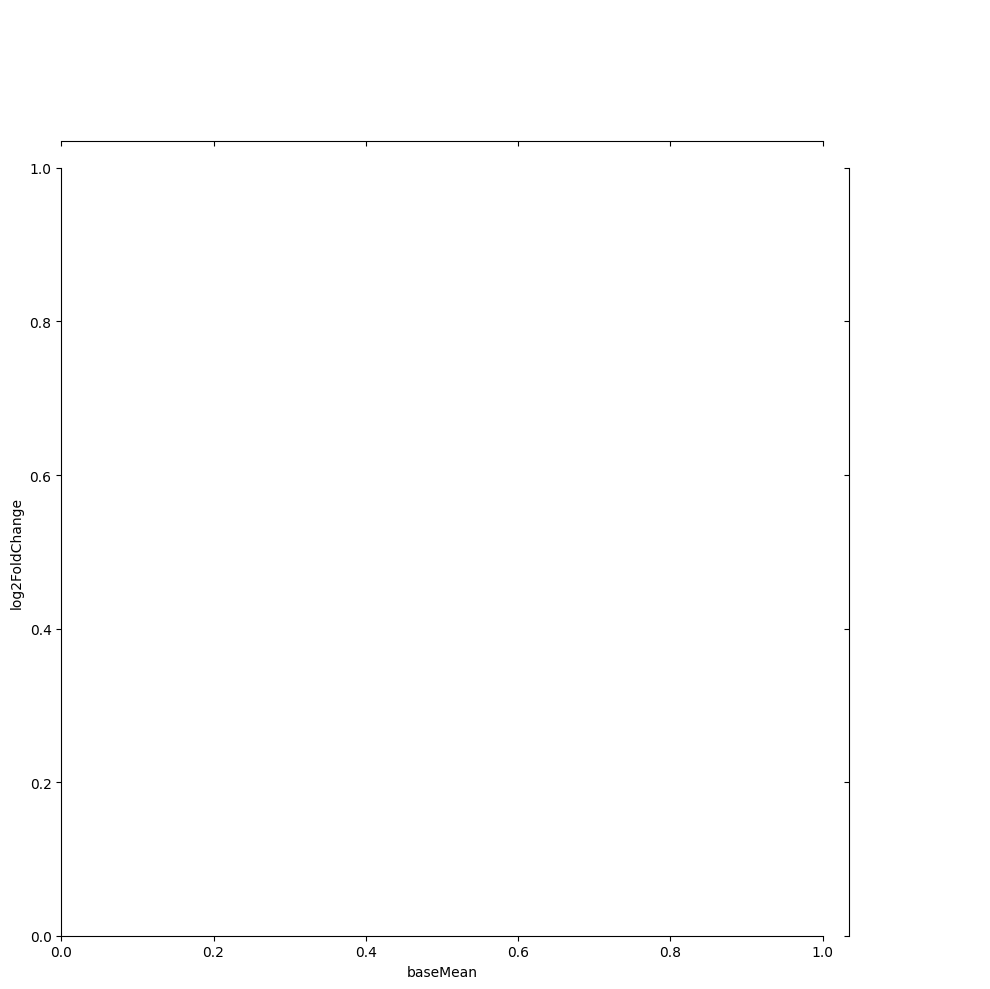

In [31]:
p = sns.jointplot(data=double_depl,
              height=10,
              #xlim=(0, 20000),
              #ylim=Y,
              y = 'log2FoldChange', 
              x = 'baseMean',
              hue = 'spin',
              palette = spin_colors,
              hue_order = spin_order,
              marginal_kws={"log_scale":False, "common_norm":False},
              alpha=0.2,
              legend=True
             )
p.fig.suptitle("double_depletion vs control - SPIN states")
p.fig.subplots_adjust(top=0.95)
#p.ax_joint.set_yscale('log')
p.set_axis_labels('log baseMean (log of mean of normalized counts)', 'log2FC', fontsize=14)
plt.legend(fontsize='small')
plt.rcParams['pdf.fonttype'] = 42


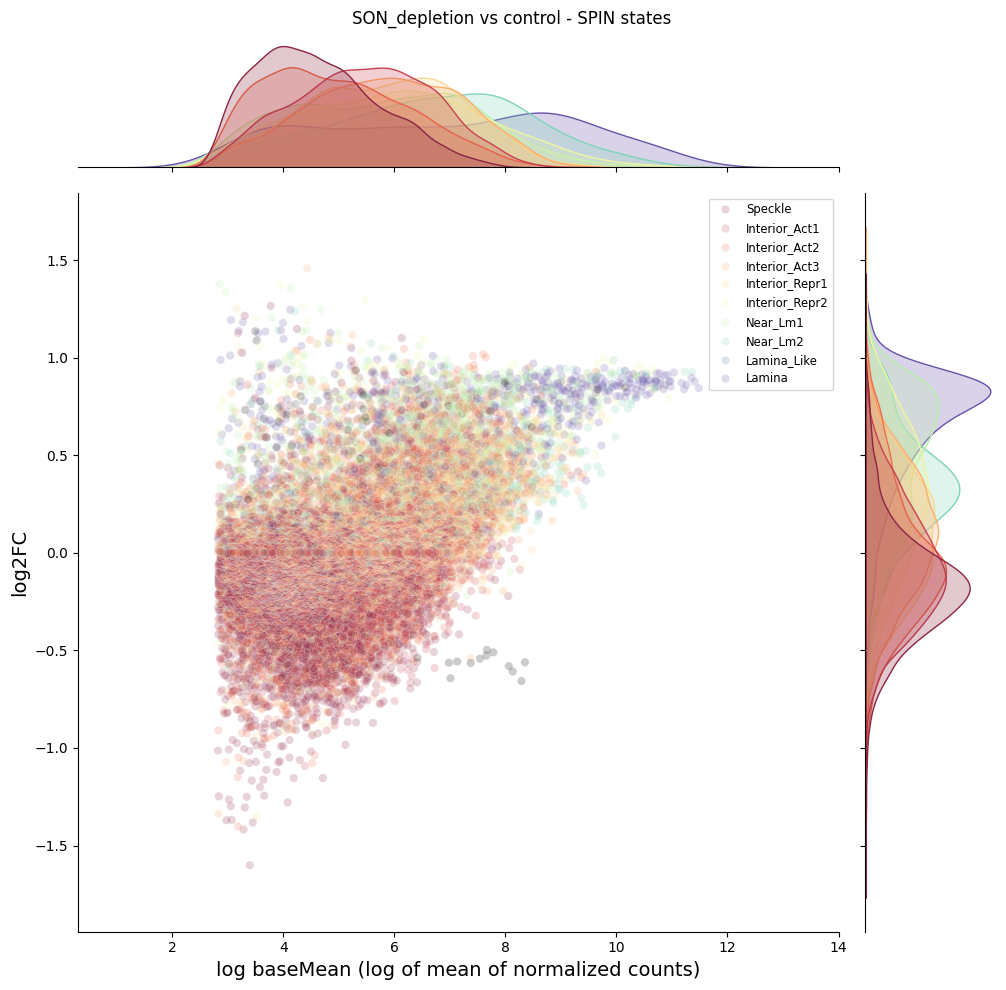

In [ ]:
p = sns.jointplot(data=SON_depl,
              height=10,
              #xlim=(0, 20000),
              #ylim=Y,
              y = 'log2FoldChange', 
              x = 'baseMean',
              hue = 'spin',
              palette = spin_colors,
              hue_order = spin_order,
              marginal_kws={"log_scale":False, "common_norm":False},
              alpha=0.2,
              legend=True
             )
p.fig.suptitle("SON_depletion vs control - SPIN states")
p.fig.subplots_adjust(top=0.95)
#p.ax_joint.set_yscale('log')
p.set_axis_labels('log baseMean (log of mean of normalized counts)', 'log2FC', fontsize=14)
plt.legend(fontsize='small')
plt.rcParams['pdf.fonttype'] = 42


ValueError: The palette dictionary is missing keys: {'Lamina', 'Near_Lm2', 'Speckle', 'Interior_Repr2', 'Interior_Repr1', 'Interior_Act1', 'Interior_Act2', 'Interior_Act3', 'Lamina_Like', 'Near_Lm1'}

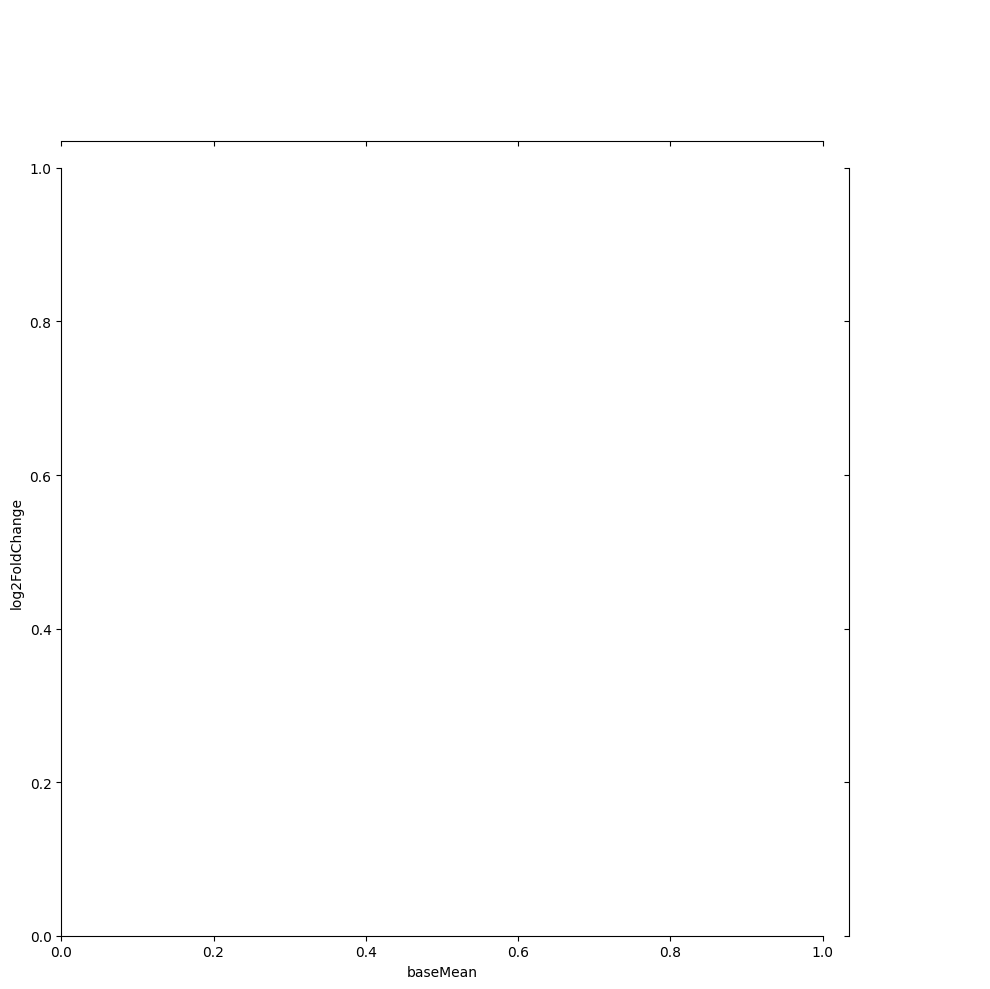

In [32]:
p = sns.jointplot(data=SRRM2_depl,
              height=10,
              #xlim=(0, 20000),
              #ylim=Y,
              y = 'log2FoldChange', 
              x = 'baseMean',
              hue = 'spin',
              palette = spin_colors,
              hue_order = spin_order,
              marginal_kws={"log_scale":False, "common_norm":False},
              alpha=0.2,
              legend=True
             )
p.fig.suptitle("SRRM2_depletion vs control - SPIN states")
p.fig.subplots_adjust(top=0.95)
#p.ax_joint.set_yscale('log')
p.set_axis_labels('log baseMean (log of mean of normalized counts)', 'log2FC', fontsize=14)
plt.legend(fontsize='small')
plt.rcParams['pdf.fonttype'] = 42


In [34]:
def assign_proximity(row):
    if row['spin'] == 'Speckle' and row['padj'] < 0.05:
        return 'Speckle-proximal'  
    elif row['spin'] == 'Interior_Act1' and row['padj'] < 0.05:
        return 'Speckle-proximal'
    elif row['spin'] == 'Interior_Act2' and row['padj'] < 0.05:
        return 'Speckle-proximal'
    elif row['spin'] == 'Interior_Act3' and row['padj'] < 0.05:
        return 'Others'
    elif row['spin'] == 'Interior_Repr1' and row['padj'] < 0.05:
        return 'Others'
    elif row['spin'] == 'Interior_Repr2' and row['padj'] < 0.05:
        return 'Others'
    elif row['spin'] == 'Near_Lm1' and row['padj'] < 0.05:
        return 'Speckle-distal'
    elif row['spin'] == 'Near_Lm2' and row['padj'] < 0.05:
        return 'Speckle-distal'    
    elif row['spin'] == 'Lamina_Like' and row['padj'] < 0.05:
        return 'Speckle-distal'
    elif row['spin'] == 'Lamina' and row['padj'] < 0.05:
        return 'Speckle-distal' 
    elif row['padj'] >= 0.05:
        return 'Non-significant'
    else:
        return 'Non-significant'  # Assign a default color for other cases

# Apply the function to create a new column 'custom_color'
double_depl['proximity'] = double_depl.apply(assign_proximity, axis=1)
SON_depl['proximity'] = SON_depl.apply(assign_proximity, axis=1)
SRRM2_depl['proximity'] = SRRM2_depl.apply(assign_proximity, axis=1)

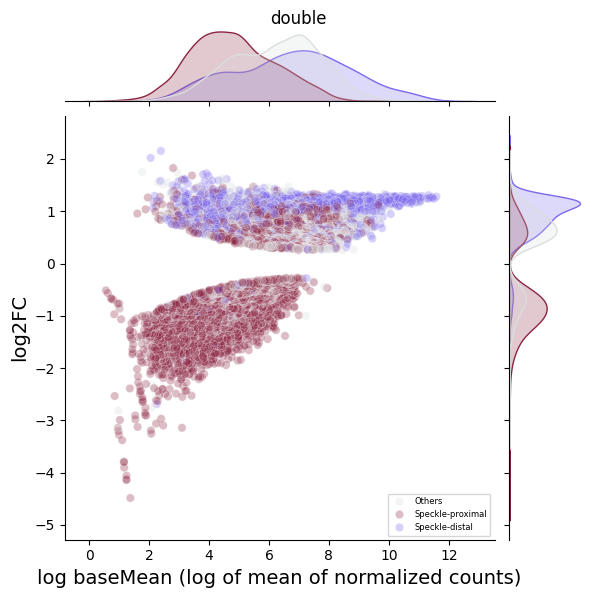

In [35]:
spin_colors = {'Others':'#DADEDF', 'Speckle-proximal': '#8C2542','Speckle-distal': '#7b68ee'}


temp = double_depl[double_depl['padj'] < 0.05]
# Create a jointplot using the custom_color column for coloring
p = sns.jointplot(data=temp,
                  x='baseMean',
                  y='log2FoldChange',
                  palette=spin_colors,
                  hue_order=list(spin_colors.keys()),                  
                  hue='proximity',
                  alpha=0.3,
                  legend=True,
                  marginal_kws={"log_scale": False, "common_norm": False},
                  rasterized=True
                  )

# Customize labels, scaling, and legend in the jointplot
p.set_axis_labels('log baseMean (log of mean of normalized counts)', 'log2FC', fontsize=14)
#p.ax_joint.set_xscale('log')
p.fig.subplots_adjust(top=0.95)
#p.ax_joint.set_ylim(Y)
#p.ax_joint.legend(fontsize='small')
p.fig.suptitle("double")
plt.legend(loc=4, prop={'size': 6})
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../data/double_scatterplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

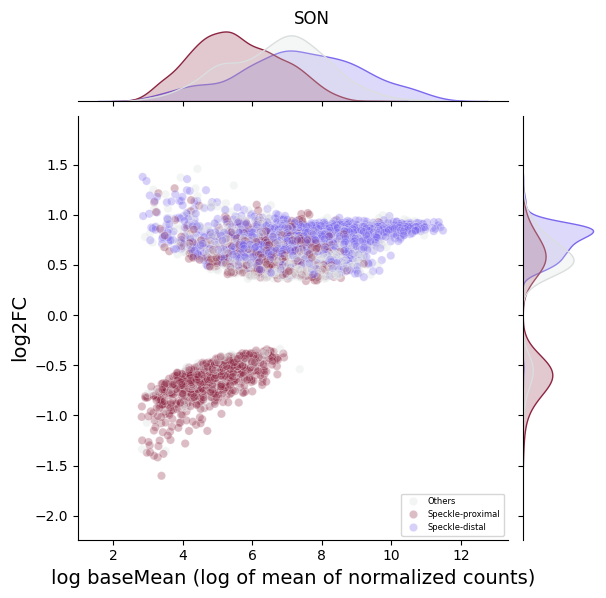

In [ ]:
temp = SON_depl[SON_depl['padj'] < 0.05]
# Create a jointplot using the custom_color column for coloring
p = sns.jointplot(data=temp,
                  x='baseMean',
                  y='log2FoldChange',
                  palette=spin_colors,
                  hue_order=list(spin_colors.keys()),                  
                  hue='proximity',
                  alpha=0.3,
                  legend=True,
                  marginal_kws={"log_scale": False, "common_norm": False},
                  rasterized=True
                  )

# Customize labels, scaling, and legend in the jointplot
p.set_axis_labels('log baseMean (log of mean of normalized counts)', 'log2FC', fontsize=14)
#p.ax_joint.set_xscale('log')
p.fig.subplots_adjust(top=0.95)
#p.ax_joint.set_ylim(Y)
#p.ax_joint.legend(fontsize='small')
p.fig.suptitle("SON")
plt.legend(loc=4, prop={'size': 6})
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../data/SON_scatterplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

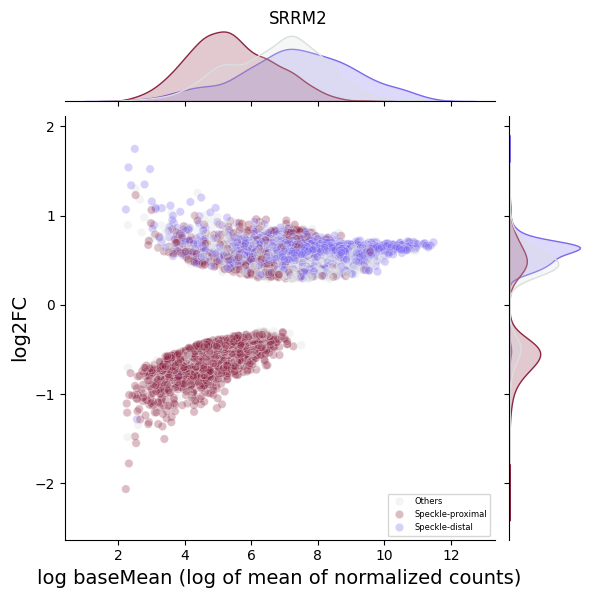

In [ ]:
temp = SRRM2_depl[SRRM2_depl['padj'] < 0.05]
# Create a jointplot using the custom_color column for coloring
p = sns.jointplot(data=temp,
                  x='baseMean',
                  y='log2FoldChange',
                  palette=spin_colors,
                  hue_order=list(spin_colors.keys()),                  
                  hue='proximity',
                  alpha=0.3,
                  legend=True,
                  marginal_kws={"log_scale": False, "common_norm": False},
                  rasterized=True
                  )

# Customize labels, scaling, and legend in the jointplot
p.set_axis_labels('log baseMean (log of mean of normalized counts)', 'log2FC', fontsize=14)
#p.ax_joint.set_xscale('log')
p.fig.subplots_adjust(top=0.95)
#p.ax_joint.set_ylim(Y)
#p.ax_joint.legend(fontsize='small')
p.fig.suptitle("SRRM2")
plt.legend(loc=4, prop={'size': 6})
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../data/SRRM2_scatterplot.pdf', dpi=300, bbox_inches='tight')
plt.show()